In [131]:
import os
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [132]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)


TensorFlow version: 2.17.0
Keras version: 3.5.0


In [133]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,BatchNormalization
from tensorflow.keras.optimizers import Adamax
from keras.metrics import AUC
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve


In [135]:
def data(path):
    classes = []
    class_paths = []
    files = os.listdir(path)
    for file in files:
        label_dir = os.path.join(path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Labels')
    image_paths = pd.Series(class_paths, name='Paths')
    df = pd.concat([image_paths, image_classes], axis=1)
    return df

In [136]:
tr_df = data("archive/Training")

In [137]:
ts_df = data("archive/Test")

In [138]:
tr_df.shape

(5712, 2)

In [139]:
tr_df.head()

,Paths,Labels
0,archive/Training/pituitary/Tr-pi_0505.jpg,pituitary
1,archive/Training/pituitary/Tr-pi_0263.jpg,pituitary
2,archive/Training/pituitary/Tr-pi_0277.jpg,pituitary
3,archive/Training/pituitary/Tr-pi_1169.jpg,pituitary
4,archive/Training/pituitary/Tr-pi_0511.jpg,pituitary


In [140]:
ts_df.shape

(1311, 2)

In [141]:
ts_df.head()

,Paths,Labels
0,archive/Test/pituitary/Te-pi_0233.jpg,pituitary
1,archive/Test/pituitary/Te-pi_0227.jpg,pituitary
2,archive/Test/pituitary/Te-pi_0019.jpg,pituitary
3,archive/Test/pituitary/Te-pi_0031.jpg,pituitary
4,archive/Test/pituitary/Te-pi_0025.jpg,pituitary


In [142]:
valid_df, test_df = train_test_split(ts_df, train_size = 0.5, shuffle = True, random_state = 123)
print(valid_df.shape)
print(test_df.shape)

(655, 2)
(656, 2)


In [143]:
batch_size = 64
img_size = (224, 224)

In [144]:
idg = ImageDataGenerator(rescale=1./255)

In [145]:
train = idg.flow_from_dataframe(tr_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical',
                                 shuffle = True, batch_size = batch_size)


Found 5712 validated image filenames belonging to 4 classes.


In [146]:
train_labels=train.classes

In [147]:
valid = idg.flow_from_dataframe(valid_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical',
                                   shuffle = True, batch_size = batch_size)

Found 655 validated image filenames belonging to 4 classes.


In [148]:
valid_labels=valid.classes

In [149]:
test = idg.flow_from_dataframe(test_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical',
                                 shuffle = False, batch_size = batch_size)

Found 656 validated image filenames belonging to 4 classes.


In [150]:
test_labels=test.classes
test_labels

[2,
 0,
 1,
 3,
 2,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 1,
 2,
 3,
 0,
 3,
 2,
 3,
 3,
 2,
 2,
 0,
 3,
 1,
 0,
 1,
 3,
 3,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 3,
 2,
 2,
 0,
 3,
 0,
 2,
 1,
 3,
 2,
 0,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 2,
 3,
 1,
 3,
 1,
 1,
 3,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 3,
 0,
 3,
 0,
 2,
 1,
 3,
 0,
 3,
 0,
 0,
 0,
 1,
 2,
 2,
 3,
 2,
 2,
 1,
 0,
 2,
 3,
 0,
 2,
 2,
 3,
 0,
 1,
 3,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 3,
 2,
 1,
 3,
 3,
 2,
 3,
 0,
 3,
 2,
 0,
 3,
 1,
 0,
 0,
 1,
 2,
 2,
 3,
 0,
 3,
 1,
 0,
 1,
 0,
 0,
 3,
 3,
 0,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 1,
 3,
 2,
 3,
 0,
 0,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 2,
 3,
 0,
 1,
 1,
 1,
 3,
 3,
 3,
 0,
 1,
 3,
 3,
 2,
 3,
 1,
 3,
 0,
 1,
 2,
 2,
 3,
 3,
 3,
 0,
 3,
 2,
 1,
 2,
 1,
 3,
 3,
 2,
 3,
 3,
 1,
 0,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 0,
 3,
 0,
 2,
 2,
 1,
 2,
 3,
 1,
 3,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 3,
 0,
 2,
 0,
 2,
 2,


In [151]:
class_index = train.class_indices
class_index

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [152]:
Keys = list(class_index.keys())
Keys

['glioma', 'meningioma', 'notumor', 'pituitary']

In [153]:
imgs, labels = next(train)

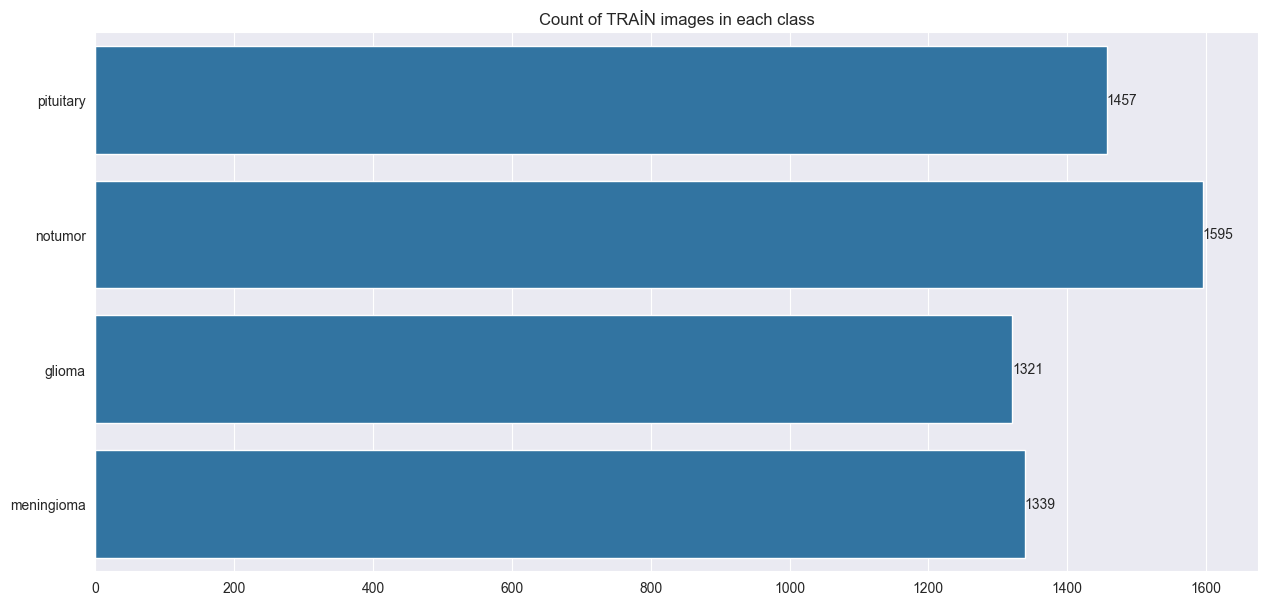

In [154]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Labels'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of TRAİN images in each class', fontsize=12)
ax.bar_label(ax.containers[0])
plt.show()

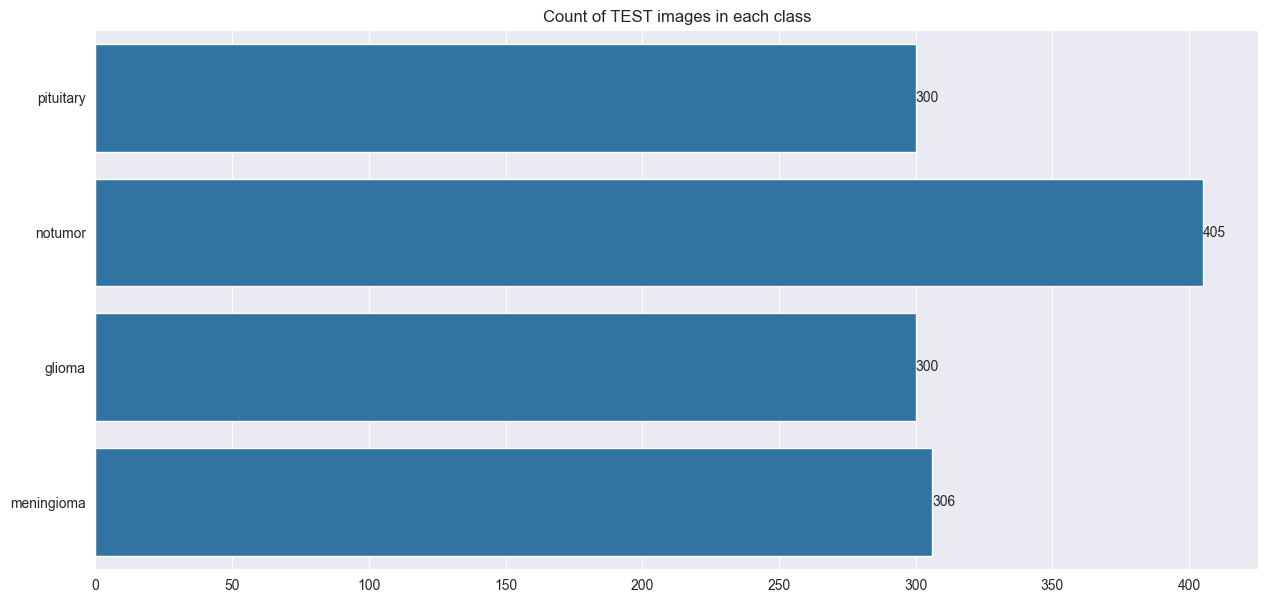

In [155]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Labels'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of TEST images in each class', fontsize=12)
ax.bar_label(ax.containers[0])
plt.show()

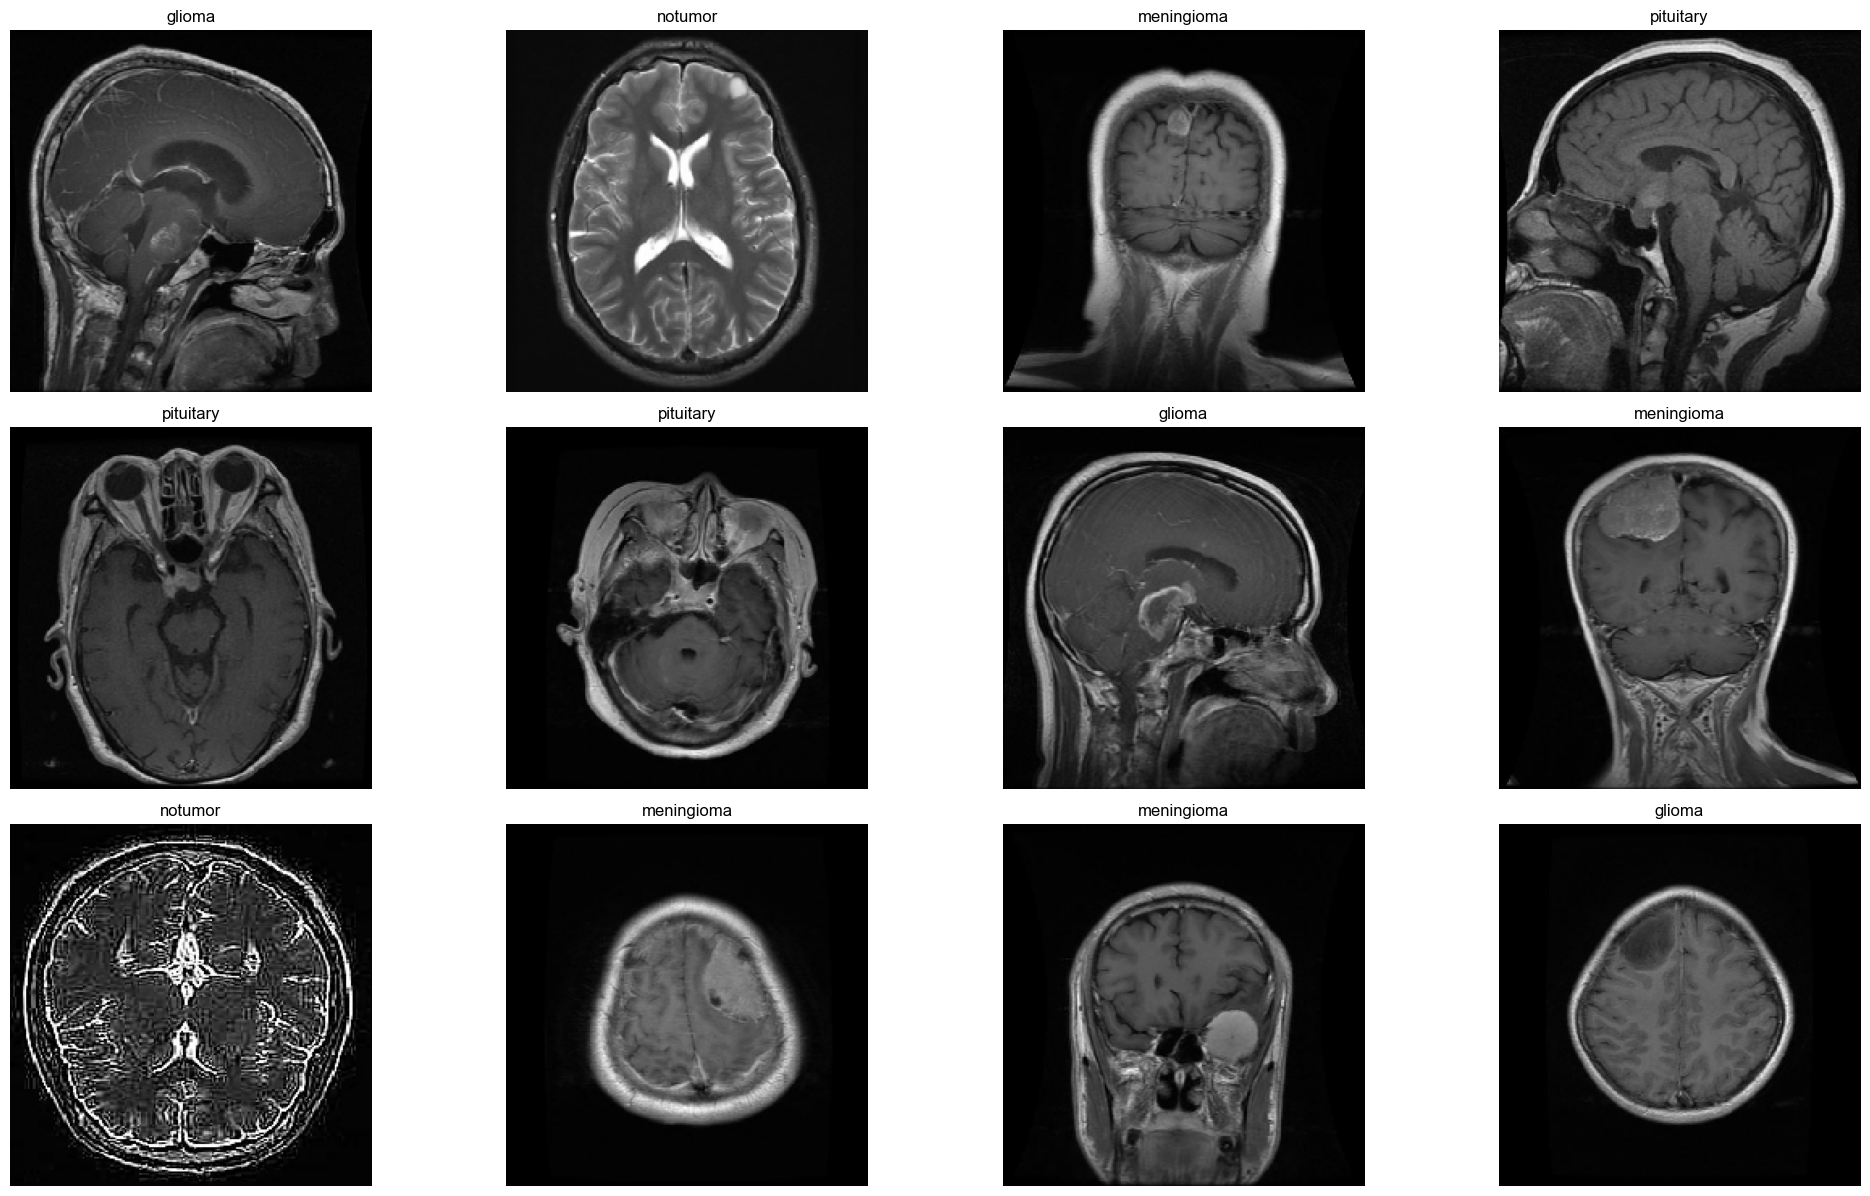

In [156]:
plt.figure(figsize= (20, 20))

for i in range(12):
    plt.subplot(5, 4, i +1)
    im = imgs[i]
    plt.imshow(im)
    index = np.argmax(labels[i])
    label = Keys[index]
    plt.title(label, color = 'black')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [157]:
model = Sequential()

# Conv2D-1
model.add(Conv2D(32, (1, 1), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization(axis=-1))
# Conv2D-2
model.add(Conv2D(64, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
# Conv2D-3
model.add(Conv2D(64, (2, 2), activation='relu'))
# Conv2D-4
model.add(Conv2D(64, (3, 3), activation='relu'))
# Conv2D-5
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
# Conv2D-6
model.add(Conv2D(128, (3, 3), activation='relu'))
# Conv2D-7
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
# FC-1
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
# FC-2
model.add(Dense(4, activation='softmax'))


/Users/sumeyyekaratekin/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [158]:
opt = tf.keras.optimizers.Adamax(learning_rate=0.001)

In [159]:
#model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

In [160]:
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=[AUC(name='auc')])

In [185]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 224, 224, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 224, 224, 64)   │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 111, 111, 64)   │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 107, 107, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 53, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 53, 53, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 51, 51, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 48, 48, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1000)           │    73,729,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,819,814 (849.99 MB)

 Trainable params: 74,273,036 (283.33 MB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 148,546,074 (566.66 MB)

In [164]:
history = model.fit(x = train, epochs = 15, verbose = 1, validation_data = valid, shuffle = False)

Epoch 1/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - auc: 0.9874 - loss: 0.2684

/Users/sumeyyekaratekin/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 79s 877ms/step - auc: 0.9874 - loss: 0.2687 - val_auc: 0.4972 - val_loss: 23.9048
Epoch 2/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 78s 868ms/step - auc: 0.9939 - loss: 0.1901 - val_auc: 0.5148 - val_loss: 16.1732
Epoch 3/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 78s 861ms/step - auc: 0.9987 - loss: 0.0851 - val_auc: 0.5951 - val_loss: 4.9451
Epoch 4/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 78s 864ms/step - auc: 0.9996 - loss: 0.0493 - val_auc: 0.7380 - val_loss: 2.6544
Epoch 5/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 78s 866ms/step - auc: 1.0000 - loss: 0.0217 - val_auc: 0.8363 - val_loss: 1.7240
Epoch 6/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 78s 868ms/step - auc: 0.9998 - loss: 0.0167 - val_auc: 0.9240 - val_loss: 0.9076
Epoch 7/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 78s 861ms/step - auc: 1.0000 - loss: 0.0110 - val_auc: 0.9837 - val_loss: 0.2730
Epoch 8/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 78s 861ms/step - auc: 1.0000 - loss: 0.0055 - val_auc: 0.9935 - val_loss: 0.1491
Epoch 9/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 78s 865ms/step - au

In [165]:
tr_auc = history.history['auc']
tr_loss_auc = history.history['loss']

v_auc = history.history['val_auc']
v_loss_auc = history.history['val_loss']

index_auc = np.argmax(v_auc)
high_Vauc = v_auc[index_auc]
index_loss_auc = np.argmin(v_loss_auc)
low_Vloss_auc = v_loss_auc[index_loss_auc]

Epochs =[]
for i in range(len(tr_auc)):
    Epochs.append (i+1)

best_auc = f'Best epoch ={str(index_auc +1)}'
best_loss = f'Best epoch ={str(index_loss_auc+1)}'

In [166]:
print(Epochs)
print(tr_auc)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.986102819442749, 0.9949509501457214, 0.9989149570465088, 0.9994292259216309, 0.9999346733093262, 0.9998599886894226, 0.9999964237213135, 0.9999998807907104, 0.9999999403953552, 0.9998679757118225, 0.999999463558197, 0.999996542930603, 0.9999999403953552, 0.9999999403953552, 1.0]


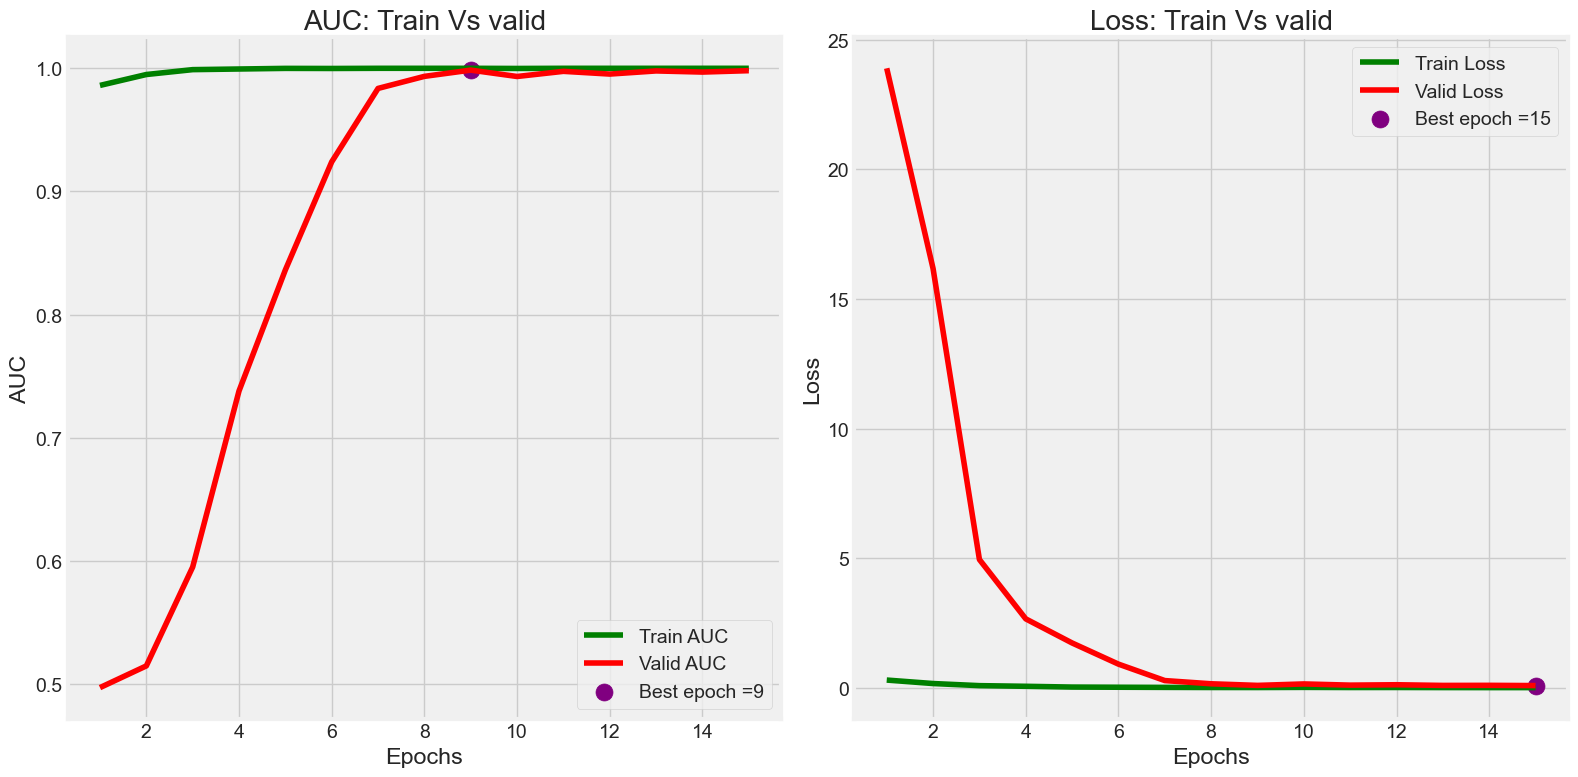

In [167]:
plt.figure(figsize = (16, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs, tr_auc, "g", label = "Train AUC")
plt.plot(Epochs, v_auc, "r", label = "Valid AUC")
plt.scatter(index_auc+1, high_Vauc, s= 150, color = 'purple', label = best_auc)

plt.title("AUC: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()


plt.subplot(1,2,2)
plt.plot(Epochs, tr_loss_auc, "g", label = "Train Loss")
plt.plot(Epochs, v_loss_auc, "r", label = "Valid Loss")
plt.scatter(index_loss_auc+1, low_Vloss_auc, s= 150, color = 'purple', label = best_loss)

plt.title("Loss: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [202]:
from keras.models import load_model, save_model, Model

In [169]:
#save_model(model, 'accuracy_cnn_model.h5')

In [170]:
#save_model(model, 'auc_cnn_model.keras')

In [171]:
# Kaydedilen modeli yükle
#loaded_model = load_model('auc_cnn_model.keras')

In [172]:
loaded_model = model

In [173]:
tr_loss,tr_auc = loaded_model.evaluate(train)
print("Auc Train Data: ",tr_auc)
print("Loss Train Data: ",tr_loss)

loss,auc = loaded_model.evaluate(test)
print("Auc Test Data: ",auc)
print("Loss Test Data: ",loss)

90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - auc: 1.0000 - loss: 7.0691e-04
Auc Train Data:  1.0
Loss Train Data:  0.0006828085170127451


/Users/sumeyyekaratekin/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - auc: 0.9911 - loss: 0.1571
Auc Test Data:  0.9948416352272034
Loss Test Data:  0.11927051097154617


In [175]:
preds = loaded_model.predict(test)
y_pred = np.argmax(preds, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step


In [176]:
train_sc = model.evaluate(train, verbose=0)
valid_sc = model.evaluate(valid, verbose=0)
test_sc = model.evaluate(test, verbose=0)
print(train_sc)
print(valid_sc)
print(test_sc)

[0.0006828084005974233, 1.0]
[0.07978105545043945, 0.9980704188346863]
[0.11927051097154617, 0.9948416352272034]


In [177]:
y_pred

array([2, 0, 1, 3, 2, 0, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1,
       3, 3, 1, 2, 3, 1, 3, 2, 3, 3, 2, 2, 0, 3, 1, 1, 1, 3, 3, 2, 2, 1,
       0, 0, 0, 2, 2, 1, 3, 2, 2, 0, 3, 0, 2, 1, 3, 2, 1, 1, 2, 2, 0, 1,
       0, 2, 1, 2, 3, 1, 3, 1, 1, 3, 2, 2, 1, 0, 0, 2, 2, 2, 0, 3, 0, 3,
       0, 2, 1, 3, 0, 3, 0, 0, 0, 1, 2, 2, 3, 2, 2, 1, 0, 2, 3, 0, 2, 2,
       3, 0, 0, 3, 2, 1, 2, 0, 1, 0, 1, 2, 0, 2, 3, 2, 1, 3, 3, 2, 3, 0,
       3, 2, 0, 3, 1, 0, 0, 1, 2, 2, 3, 0, 3, 1, 0, 1, 0, 0, 3, 3, 0, 2,
       2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 0, 0, 1, 1, 3, 3, 3, 3, 1, 3, 3, 2,
       3, 0, 1, 1, 1, 3, 3, 3, 0, 1, 3, 3, 2, 3, 1, 3, 0, 1, 2, 2, 3, 3,
       3, 0, 3, 2, 1, 2, 1, 3, 3, 2, 3, 3, 1, 0, 3, 2, 2, 3, 2, 2, 2, 0,
       3, 0, 2, 2, 1, 2, 3, 1, 3, 1, 1, 0, 1, 2, 1, 2, 0, 3, 2, 2, 1, 2,
       2, 3, 3, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1, 3, 2, 3, 2, 3, 0, 0,
       0, 3, 0, 2, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1,
       1, 3, 1, 1, 2, 3, 0, 0, 2, 3, 1, 2, 0, 1, 1,

In [178]:
cm = confusion_matrix(test.classes, y_pred)
cm

array([[127,  12,   0,   0],
       [  3, 145,   3,   2],
       [  1,   0, 199,   0],
       [  0,   0,   0, 164]])

In [179]:
Test_cl_ind = test.class_indices
classes = list(Test_cl_ind.keys())

In [181]:
predictions = model.predict(test)
y_pred = np.argmax(predictions, axis=1)

print(predictions)
print(y_pred)

cm = confusion_matrix(test.classes, y_pred)
cm

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step
[[4.2204974e-24 1.4372014e-05 9.9998558e-01 3.0135790e-13]
 [9.9944049e-01 6.4814060e-08 3.4474063e-08 5.5939227e-04]
 [5.6225649e-04 9.9937218e-01 1.4625091e-07 6.5349072e-05]
 ...
 [4.4545619e-28 9.9544108e-01 4.5589264e-03 5.6615790e-18]
 [8.4077136e-09 5.5739665e-06 2.7599728e-07 9.9999416e-01]
 [9.9999356e-01 6.2170316e-06 1.3546185e-07 1.3192910e-07]]
[2 0 1 3 2 0 0 1 2 1 1 2 0 0 0 0 2 1 1 2 1 1 3 3 1 2 3 1 3 2 3 3 2 2 0 3 1
 1 1 3 3 2 2 1 0 0 0 2 2 1 3 2 2 0 3 0 2 1 3 2 1 1 2 2 0 1 0 2 1 2 3 1 3 1
 1 3 2 2 1 0 0 2 2 2 0 3 0 3 0 2 1 3 0 3 0 0 0 1 2 2 3 2 2 1 0 2 3 0 2 2 3
 0 0 3 2 1 2 0 1 0 1 2 0 2 3 2 1 3 3 2 3 0 3 2 0 3 1 0 0 1 2 2 3 0 3 1 0 1
 0 0 3 3 0 2 2 3 2 2 2 3 2 3 2 3 0 0 1 1 3 3 3 3 1 3 3 2 3 0 1 1 1 3 3 3 0
 1 3 3 2 3 1 3 0 1 2 2 3 3 3 0 3 2 1 2 1 3 3 2 3 3 1 0 3 2 2 3 2 2 2 0 3 0
 2 2 1 2 3 1 3 1 1 0 1 2 1 2 0 3 2 2 1 2 2 3 3 0 2 0 2 2 1 2 0 0 0 0 1 3 2
 3 2 3 0 0 0 3 0 2 1 1 3 3 2 3 1 2 2 2 1 1 1 0 0 2 0 1 1 3 1 1 2 3 0 0 2 3

array([[127,  12,   0,   0],
       [  3, 145,   3,   2],
       [  1,   0, 199,   0],
       [  0,   0,   0, 164]])

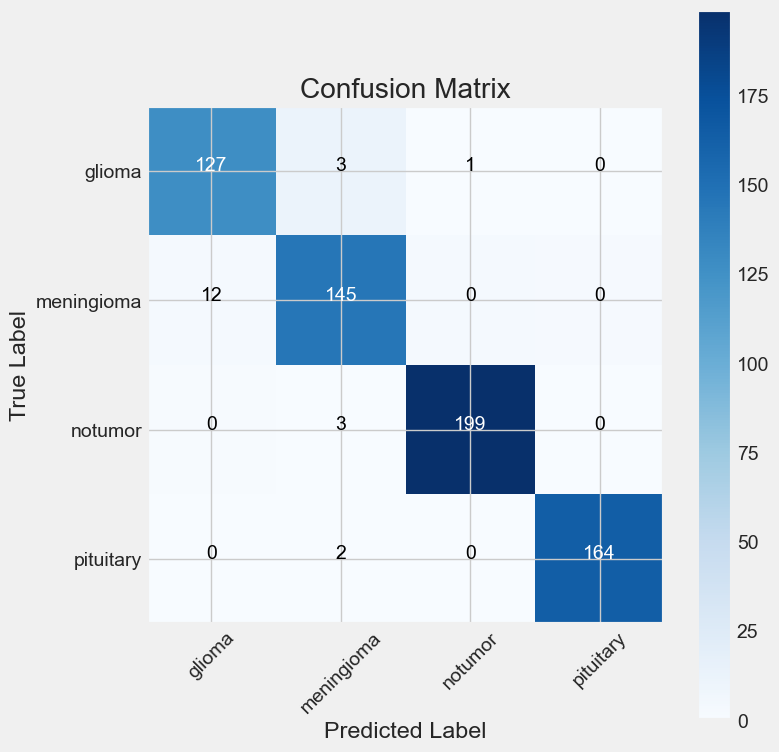

In [182]:
plt.figure(figsize =(8, 8))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation = 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [198]:
for layer in loaded_model.layers:
    print(layer.name)

conv2d_21
batch_normalization_12
conv2d_22
max_pooling2d_9
batch_normalization_13
conv2d_23
conv2d_24
conv2d_25
max_pooling2d_10
batch_normalization_14
conv2d_26
conv2d_27
max_pooling2d_11
batch_normalization_15
flatten_3
dense_6
dense_7


In [200]:
from keras import Model

# Özellik çıkarma katmanlarının belirlenmesi
#feature_extraction_model = Model(inputs=loaded_model.input, outputs=loaded_model.layers[-2].output)
feature_extraction_model = Model(inputs=model.input, outputs=model.get_layer('dense_6').output)

feature_extraction_model.summary()

ValueError: The layer sequential_3 has never been called and thus has no defined input.

In [201]:
# Eğitim ve test özelliklerini çıkartma
train_features = feature_extraction_model.predict(train)
test_features = feature_extraction_model.predict(test)

NameError: name 'feature_extraction_model' is not defined

In [ ]:
#train_features = train_features.flatten()
#test_features = test_features.flatten()

In [ ]:
test_features
train_features

In [ ]:
# Veri kümesindeki sınıfları sayısal değerlere dönüştürün
#label_encoder = LabelEncoder()
#df['encoded_labels'] = label_encoder.fit_transform(df['Label'])


In [ ]:
test.labels

In [ ]:
#TRAIN DATA
batch_index=0
X_train_features=[]
y_train_one_hot=[]
while batch_index <= train.batch_index:
    data = train.next()
    for element in data[0]:
       X_train_features.append(feature_extraction_model.predict(np.array([element])).reshape(-1))
    for target in data[1]:
       y_train_one_hot.append(target)
    batch_index = batch_index + 1
del train
X_train_features=np.array(X_train_features)
y_train_one_hot=np.array(y_train_one_hot)
y_train=[]
for y in y_train_one_hot:
    y_train.append(np.argmax(y))

In [ ]:
#TEST DATA
X_test_features=[]
y_test_one_hot=[]
batch_index=0
while batch_index <= test.batch_index:
    data = test.next()
    for element in data[0]:
       X_test_features.append(feature_extraction_model.predict(np.array([element])).reshape(-1))
    for target in data[1]:
       y_test_one_hot.append(target)
    batch_index = batch_index + 1
del test
X_test_features=np.array(X_test_features)
y_test_one_hot=np.array(y_test_one_hot)
y_test=[]
for y in y_test_one_hot:
    y_test.append(np.argmax(y))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_features, y_train)

In [ ]:
#y_predictions = knn.predict(X_test_features)
#y_predictions

In [ ]:
predictions = knn.predict_proba(test_features)

In [ ]:
predictions

In [ ]:
test_labels

In [ ]:
auc_test = roc_auc_score(test_labels, predictions,multi_class='ovr')
print("ROC AUC score TEST: ",auc_test)

In [ ]:
Test_cl_ind = test.class_indices
classes = list(Test_cl_ind.keys())
y_pred = np.argmax(predictions, axis=1)

knn_cm = confusion_matrix(test.classes, y_pred)
knn_cm

In [ ]:
plt.figure(figsize =(8, 8))
plt.imshow(knn_cm, interpolation = 'nearest', cmap = plt.cm.plasma)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation = 45)
plt.yticks(tick_marks, classes)


thresh = knn_cm.max() / 2.
for i, j in itertools.product(range(knn_cm.shape[0]), range(knn_cm.shape[1])):
    plt.text(i, j, knn_cm[i, j], horizontalalignment= 'center', color= 'black' if knn_cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(test.classes, y_pred, target_names = classes))